# ABE Competencies and Job Posts Homework

In [1]:
import pandas as pd
import string
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import seaborn as sns
from collections import Counter

abe_survey = pd.read_excel('ABE Career Outcomes Data 2016-2021.xlsx')
competencies = pd.read_excel('competencies.xlsx')
abe_comp = competencies[competencies['Major']=='Engineering'].drop(['Option(s)', 'Major'], axis=1)
bse = abe_survey[abe_survey['Major 1 at Graduation'] == 'Biological Systems Engineering']
ag = abe_survey[abe_survey['Major 1 at Graduation'] == 'Agricultural Engineering']
print('TOP 10 EMPLOYERS FOR BSE AND AE \n \nBSE Common Employers:\n',bse['Organization Name'].value_counts().nlargest(10))
print('AE Common Employers: \n', ag['Organization Name'].value_counts().nlargest(10))

TOP 10 EMPLOYERS FOR BSE AND AE 
 
BSE Common Employers:
 Cargill, Incorporated            6
John Deere                       2
Ardent Mills                     2
PepsiCo                          2
ADM                              2
ISG                              2
Burns & McDonnell Engineering    1
DuPont Industrial Biosciences    1
JLL                              1
JEO Consulting Group, Inc.       1
Name: Organization Name, dtype: int64
AE Common Employers: 
 John Deere                                     16
Vermeer Corporation                            12
Henning Companies LLC                           5
AGCO Corporate Group                            5
Kuhn North America, Inc.                        5
Ag Leader Technology                            4
USDA Natural Resources Conservation Service     3
Energy Panel Structures, Inc.                   3
Sage Ag LLC                                     3
CNH Industrial                                  3
Name: Organization Name, dtype:

In [60]:
bse_job = bse['Job Title'].value_counts().nlargest(5)
ag_job = ag['Job Title'].value_counts().nlargest(5)
print("Most popular BSE jobs:\n", bse_job)
print("Most popular AG ENGR jobs:\n", ag_job)

Most popular BSE jobs:
 Design Engineer                      3
Production Engineer                  3
Production Management Engineer       2
Management Associate                 2
Supply chain management associate    1
Name: Job Title, dtype: int64
Most popular AG ENGR jobs:
 Design Engineer           25
Project Engineer           9
Manufacturing Engineer     7
Agricultural Engineer      4
Test Engineer              3
Name: Job Title, dtype: int64


In [61]:
bse_job = bse['Job Title'].value_counts().nlargest(4).to_frame()
ag_job = ag['Job Title'].value_counts().nlargest(4).to_frame()
bse_joblist = bse_job.index.tolist()
ag_joblist = ag_job.index.tolist()
abe_joblist = bse_joblist + ag_joblist
abe_joblist = list(set(abe_joblist))
abe_joblist

['Production Management Engineer',
 'Manufacturing Engineer',
 'Agricultural Engineer',
 'Management Associate',
 'Project Engineer',
 'Production Engineer',
 'Design Engineer']

# Task 1

- Update the text scraping function `indeed_posts` to take an additional input of keywords and job location to narrow the search. Make the necessary changes to adjust the advanced search. 

In [66]:
def indeed_posts(search_term, ___):

    kw = search_term.split(" ")
    ## *************************** a huge thank you to Ryan Jeon for developing the base of this indeed text scraping code
    # see supplemental information for the source code created by him, it has been modified for this application
    from bs4 import BeautifulSoup
    import requests
    import time
    import random
    user_agents = ['Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.93 Safari/537.36 Edg/96.0.1054.43',
                  'Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7.0; rv:11.0) like Gecko',
                  'Mozilla/5.0 (Windows NT 10.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.93 Safari/537.36',
                  'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:94.0) Gecko/20100101 Firefox/94.0']
    df = pd.DataFrame(columns = ["Job_Titles"])
    df2 = pd.DataFrame(columns = ["Company"])
    df3 = pd.DataFrame(columns = ["URL"])
    sind = f'https://www.indeed.com/jobs?as_and='
    _ = ?
    for pagenum in range(0,30,10):
        for word in range(0,len(kw)-1):
            search_url = sind + kw[word] + '%20'
        search_url = search_url + kw[len(kw)-1] + kword + end+'%20&start=' + str(pagenum)
        user_agent = random.choice(user_agents)
        headers = {
                'dnt': '1',
                'upgrade-insecure-requests': '1',
                'User-Agent': user_agent,
                'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
                'sec-fetch-site': 'none',
                'sec-fetch-mode': 'navigate',
                'sec-fetch-user': '?1',
                'sec-fetch-dest': 'document',
                'accept-language': 'en-GB,en-US;q=0.9,en;q=0.8',
                }
        r = requests.get(search_url, headers = headers)
        time.sleep(10*random.random())
        soup = BeautifulSoup(r.text, 'html.parser')
        titles = soup.select("h2 span") 
        # select all span tags under the umbrella of h2 tags 
        companies = soup.find_all(class_ = "companyName")
        URLs = soup.find_all('a', attrs = {'class' : 'tapItem'})
        for title in titles:
            titles_list = title.text
            # the gotcha here is that there are "news" scattered so we have to remove those first before concatenating our data
            df.loc[len(df.index)] = [titles_list]
            df = df[df.Job_Titles != "new"]
        for company in companies:
            company_list = company.text
            df2.loc[len(df2.index)] = [company_list]
        for URL in URLs:
            base = 'http://www.indeed.com'
            link = URL.attrs['href']
            new_URL = base + link
            df3.loc[len(df3.index)] = [new_URL]    
        ## *************************** end of code edited from Ryan Jeon's amazing work! :)
    jdesc =  pd.DataFrame(columns = ["Job Description"])

    for post in df3['URL']:
        user_agent = random.choice(user_agents)
        headers = {
                'dnt': '1',
                'upgrade-insecure-requests': '1',
                'User-Agent': user_agent,
                'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
                'sec-fetch-site': 'none',
                'sec-fetch-mode': 'navigate',
                'sec-fetch-user': '?1',
                'sec-fetch-dest': 'document',
                'accept-language': 'en-GB,en-US;q=0.9,en;q=0.8',
                }
        r = requests.get(post.format(0), headers = headers)
        soup = BeautifulSoup(r.text, 'html.parser')
        time.sleep(5*random.random())
        job_description = soup.find('div',{'id':'jobDescriptionText'})
        jd = job_description.get_text(separator=" ") if job_description else "N/A"
        jdesc.loc[len(jdesc.index)] = [jd.strip()]   
    indeed = pd.concat([df, df2, df3, jdesc], axis=1, join='inner')
    print("Done scraping for ", search_term)
    return indeed

# Task 2

- Identify another text modeling approach/processing step that can better account for the similarity of the words used in used phrases (ex. project & projects, systems & system, etc!)
- Remainder of base code has been provided here, but adjust as you see fit

In [63]:
# function to clean up text (remove common value-minimal words, punctuation, capitalization)
def clean_post(text):
    from nltk.corpus import stopwords
    stopwords = stopwords.words('english')
    engr_stopwords = ['work', 'experience', 'job', 'ability', 'insurance', 'pay', 'location', 'requirements',
                 'required', 'skill', 'skills', 'years', 'release', 'engineer', 'preferred', 'new', 'may', 'us', 'office',
                 '3m', 'status', 'must', 'cemex', 'rfa', 'ula', 'position', 'benefits', 'including', 'gdcc', 'lockheed',
                 'martin', 'andor', 'apple', 'company', 'target', 'federal', 'western', 'education', 'effectively',
                 'appropriate', 'meet', 'acquire', 'first', 'needs', 'needed', 'mode', 'rf', 'nand', 'related',
                 'cae', 'amazon', 'general', 'baker', 'zero', 'nos', 'employees', 'make']
    stopwords.extend(engr_stopwords)
    text = ''.join([word for word in text if word not in string.punctuation])
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stopwords])
    return text

In [64]:
def major_comp(joblist):
    from sklearn.feature_extraction.text import TfidfVectorizer
    import itertools
    tfidf_v = TfidfVectorizer()
    tskill = []
    dfs = {}
    for job in joblist:
        search_results = indeed_posts(job)
        posts = search_results['Job Description'].tolist()
        clean_posts = list(map(clean_post, posts))
        eval_job = tfidf_v.fit_transform(clean_posts)
        fname = tfidf_v.get_feature_names()
        
        # creating dictionary of top skills
        df = pd.DataFrame(eval_job.T.toarray(), index=fname)
        job_avg = df.mean(axis=1)
        job_avg = pd.DataFrame(job_avg.sort_values(ascending=False).nlargest(10))
        job_avg.index.name = 'Skill'
        job_avg.reset_index(inplace=True)
        dfs[job] = pd.DataFrame(job_avg['Skill'])

    # combine dictionary into dataframe
    skillsdf = pd.concat(dfs, axis=1)
    # column names = job title
    skillsdf = skillsdf.droplevel(1, axis = 1)
    skills4vec = []
    # loop through jobs
    for job in joblist:
        # convert job key skills to list
        a = skillsdf[job].tolist()
        # change from 10 strings to one long string!
        b = " ".join(a)
        # add to list of total skills, ready to use in Tfidf Vectorization
        skills4vec.append(b)    
    return skillsdf, skills4vec

In [67]:
job_skill_df, job_skill_4vec = major_comp(abe_joblist)

Done scraping for  Production Management Engineer
Done scraping for  Manufacturing Engineer
Done scraping for  Agricultural Engineer
Done scraping for  Management Associate
Done scraping for  Project Engineer
Done scraping for  Production Engineer
Done scraping for  Design Engineer


In [68]:
job_skill_df

# added to removal: ''

,Production Management Engineer,Manufacturing Engineer,Agricultural Engineer,Management Associate,Project Engineer,Production Engineer,Design Engineer
0,project,quality,engineering,team,project,quality,design
1,engineering,design,manufacturing,management,equipment,manufacturing,engineering
2,technical,equipment,process,leader,engineering,process,development
3,management,engineering,design,business,team,production,team
4,team,production,equipment,product,construction,engineering,software
5,equipment,maintenance,quality,development,systems,equipment,product
6,quality,technical,production,client,design,management,systems
7,support,support,project,university,management,processes,knowledge
8,development,manufacturing,team,time,technical,team,project
9,customer,process,state,project,schedule,product,test


In [114]:
# combine all competency strings into a single string or "document"
abe_competencies = ' '.join(abe_comp['Outcome'])
# utilize text cleaning function to remove non-keywords
clean_abe_comp = clean_post(abe_competencies)
jobncomp_4vec = ""
jobncomp_4vec = [clean_abe_comp] + job_skill_4vec 

29


['Outcomes',
 'Production Management Engineer',
 'Manufacturing Engineer',
 'Agricultural Engineer',
 'Management Associate',
 'Project Engineer',
 'Production Engineer',
 'Design Engineer']

array([[1.        , 0.23902804, 0.24906492, 0.30278205, 0.02753456,
        0.28130334, 0.23832191, 0.39331685]])

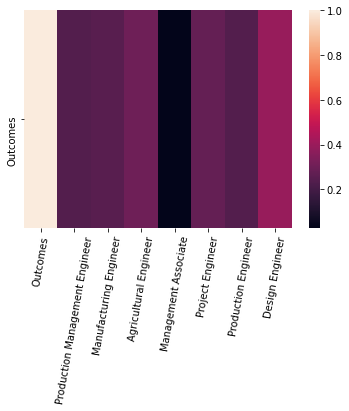

In [127]:
# initialize vector and find TF-IDF matrix for each document
tfidf_v = TfidfVectorizer()
# train with vocabulary used in job postings
jfit = tfidf_v.fit(job_skill_4vec)
# transform job posting + competency key skills to TF-IDF matrix
tf_matrix = tfidf_v.transform(jobncomp_4vec)
fname = tfidf_v.get_feature_names()
# find cosine similarity for competency vs. posting by job type
import matplotlib.pyplot as plt
csim = cosine_similarity(tf_matrix[0:1], tf_matrix)
xlab = ['Outcomes'] + abe_joblist
display(xlab)
sns.heatmap(csim, xticklabels=xlab, yticklabels=['Outcomes'])
plt.xticks(rotation=80)
csim 

In [137]:
tf_matrix.T.toarray().shape
out = tf_matrix.T.toarray()[:][0]
out.shape
# 29 = one element per key term
# 8 = one column per document
#df = pd.DataFrame(tf_matrix.T.toarray(), index=fname)

#df = df.sort_values(by=0, ascending=False)
#df.index.name = 'Outcome'
#df.reset_index(inplace=True)
#job_skill_df['Outcome'] = pd.DataFrame(df['Outcome'][:10])
#job_skill_df


(8,)

In [2]:
df = pd.DataFrame(tf_matrix.T.toarray(), index=fname)
df = df.sort_values(by=0, ascending=False)
df.index.name = 'Outcome'
df.reset_index(inplace=True)
job_skill_df['Outcome'] = pd.DataFrame(df['Outcome'][:4])
job_skill_df

NameError: name 'tf_matrix' is not defined

In [162]:
import numpy as np
# dataframe --> single array of all job keywords
x = job_skill_df.drop(['Outcome'], axis=1).to_numpy()
kwlist =x.flatten()
# count frequency
Counter(kwlist).most_common(10)

[('engineering', 6),
 ('team', 6),
 ('project', 5),
 ('equipment', 5),
 ('quality', 4),
 ('design', 4),
 ('management', 4),
 ('manufacturing', 3),
 ('technical', 3),
 ('process', 3)]